<a href="https://colab.research.google.com/github/19121A05R7/Phishing-URL-Detection-Project/blob/main/Copy_of_Detecting_Malicious_Url_With_Machine_Learning_In_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Detecting Malicious URL With Machine Learning In Python



In [ ]:

import pandas as pd
import numpy as np
import random
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:

urls_data = pd.read_csv("/content/urldata.csv")

In [ ]:
type(urls_data)

pandas.core.frame.DataFrame

In [ ]:
urls_data.head()

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad


In [ ]:
urls_data.isnull().sum().sum()

0

In [ ]:
def makeTokens(f):
    tkns_BySlash = str(f.encode('utf-8')).split('/')
    total_Tokens = []
    for i in tkns_BySlash:
        tokens = str(i).split('-')	
        tkns_ByDot = []
        for j in range(0,len(tokens)):
            temp_Tokens = str(tokens[j]).split('.')	
            tkns_ByDot = tkns_ByDot + temp_Tokens
        total_Tokens = total_Tokens + tokens + tkns_ByDot
    total_Tokens = list(set(total_Tokens))	
    if 'com' in total_Tokens:
        total_Tokens.remove('com')	
    return total_Tokens

In [ ]:
y = urls_data["label"]

In [ ]:
url_list = urls_data["url"]

In [ ]:


# Using Custom Tokenizer
vectorizer = TfidfVectorizer()

In [ ]:

X = vectorizer.fit_transform(url_list)

80/20 ratio


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)	

In [ ]:

logit = LogisticRegression()	
logit.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# Accuracy of Our Model Using Test Data
print("Accuracy ",logit.score(X_test, y_test))

Accuracy  0.9649316827797795


In [ ]:
# Accuracy of Our Model Using Train Data
print("Accuracy ",logit.score(X_train, y_train))

Accuracy  0.9724768187507247


### Predicting With Our Model

In [ ]:
X_predict = ["google.com/search=jcharistech",
"google.com/search=faizanahmad",
"pakistanifacebookforever.com/getpassword.php/", 
"www.radsport-voggel.de/wp-admin/includes/log.exe", 
"ahrenhei.without-transfer.ru/nethost.exe ",
"www.itidea.it/centroesteticosothys/img/_notes/gum.exe"]

In [ ]:
X_predict = vectorizer.transform(X_predict)
New_predict = logit.predict(X_predict)

In [ ]:
print(New_predict)

['good' 'good' 'good' 'bad' 'bad' 'bad']


In [ ]:
# https://db.aa419.org/fakebankslist.php
X_predict1 = ["www.buyfakebillsonlinee.blogspot.com", 
"www.unitedairlineslogistics.com",
"www.stonehousedelivery.com",
"www.silkroadmeds-onlinepharmacy.com" ]

In [ ]:
X_predict1 = vectorizer.transform(X_predict1)
New_predict1 = logit.predict(X_predict1)
print(New_predict1)

['good' 'bad' 'bad' 'bad']


In [ ]:
# Using Default Tokenizer
vectorizer = TfidfVectorizer()

In [ ]:
# Store vectors into X variable as Our XFeatures
X = vectorizer.fit_transform(url_list)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)	

In [ ]:
# Model Building

logitmodel = LogisticRegression()	#using logistic regression
logitmodel.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# Accuracy of Our Model with our Custom Token
print("Accuracy ",logitmodel.score(X_test, y_test))

Accuracy  0.9649316827797795


In [ ]:
X_predict2 = ["www.buyfakebillsonlinee.blogspot.com", 
"www.unitedairlineslogistics.com",
"www.stonehousedelivery.com",
"www.silkroadmeds-onlinepharmacy.com" ]

In [ ]:
X_predict2 = vectorizer.transform(X_predict2)
New_predict2 = logitmodel.predict(X_predict2)
print(New_predict2)

['good' 'bad' 'bad' 'bad']


#### Checking Confusion Matrix
    +         Predicted
    + Actual True_Pos  False_Neg
    +        False_Pos  True_Neg



![alt text](confusion_matrix.png "Confusion Matrix")

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
predicted = logitmodel.predict(X_test)
matrix = confusion_matrix(y_test, predicted)

In [ ]:
print(matrix)

[[12354  2610]
 [  339 68790]]


##### Comparing with the diagram above
+ The True positives have 12366 and the true negatives are 68752
+ + Hence it has a good performance since majority of the predictions falls in the diagonal TP and TN

#### Classification Report
 + Displays the precision, recall, F1-score and support for each class.

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
report = classification_report(y_test, predicted)


In [ ]:
print(report)

              precision    recall  f1-score   support

         bad       0.97      0.83      0.89     14964
        good       0.96      1.00      0.98     69129

    accuracy                           0.96     84093
   macro avg       0.97      0.91      0.94     84093
weighted avg       0.97      0.96      0.96     84093



### Plotting Confusion Matrix

In [ ]:
# Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
matrix

array([[12354,  2610],
       [  339, 68790]])

In [ ]:
plt.figure(figsize=(20,10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

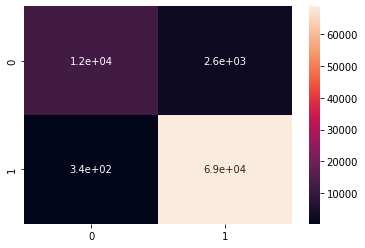

In [ ]:
# Confusion Matrix Graph With Seaborn
sns.heatmap(matrix,annot=True)
plt.show()

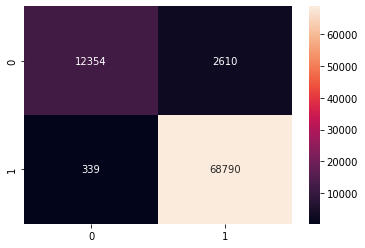

In [ ]:
# Setting formate to integer with "d"
sns.heatmap(matrix,annot=True,fmt="d")
plt.show()

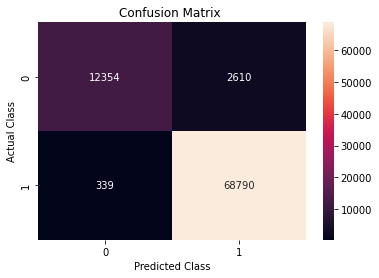

In [ ]:
# Plot with Labels

plt.title('Confusion Matrix ')

sns.heatmap(matrix,annot=True,fmt="d")
# Set x-axis label
plt.xlabel('Predicted Class')
# Set y-axis label
plt.ylabel('Actual Class')
plt.show()